| Project name   |  Sensor de colores |
|:----------|:-------------|
| **Autor(S)**| T034456, Marco Antonio Ramos Tadeo <br>T030014, Derek Ivan Lopez Anaya|
| **Editor**|Dr. Adán Hirales Carbajal|
| **Last update** |11/30/2023  |

### <span style="color:blue">Planteamiento del problema</span>

El desafío que nos proponemos abordar está relacionado con la detección de colores en resistencias mediante el uso de un sensor llamado EZO_RGB. Este enfoque busca solucionar la problemática experimentada por las personas con daltonismo, quienes enfrentan dificultades para distinguir correctamente los colores en las resistencias al intentar leer la codificación de colores. El objetivo es facilitar la identificación precisa de los colores de cada línea en las resistencias, ayudando así a las personas con daltonismo a evitar errores al seguir las guías de colores.

Las resistencias tienen códigos de colores que representan el valor conjunto con la tolerancia de un circuito eléctrico y esta codificación de colores fue definida por las normas internacionales de la comisión electrotécnica internacional. La codificación de colores puede ir de 3 a 6 bandas y cada una nos indicará su nivel de tolerancia, confiabilidad y tasa de falla. Para la lectura de estas bandas vamos a dividirlas en 4 tipos diferentes, ya que hay resistencias de 3 a 6 bandas.

La primera de tres bandas se lee de la siguiente manera: primera banda de izquierda a derecha, significa el digito más significativo del resistor, el segundo el digito mas representativo y la tercera significa la potencia de 10 elevada al color correspondiente y multiplicado por los numero obtenidos en las otras dos bandas.

Cuando es de cuatro bandas: primera banda de izquierda a derecha, significa el digito más significativo del resistor, el segundo el digito más representativo, la tercera significa la potencia de 10 elevada al color correspondiente y multiplicado por los numero obtenidos en las otras dos bandas y la cuarta banda representa la tolerancia.

De cinco bandas es: la primera banda es el digito mas significativo, la segunda banda es el segundo digito más importante, la tercera banda es el tercer digito más importante, la cuarta banda es la potencia de 10 elevada al color correspondiente y multiplicado por el numero obtenido de las tres bandas anteriores, la quinta banda representa la tolerancia.

Por último, la de seis bandas: la primera banda es el digito más significativo, la segunda banda es el segundo digito más significativo, la tercera es el tercer signo más significativo, la cuarta banda es la potencia de 10 elevada al color correspondiente y multiplicado por el numero obtenido de las tres bandas anteriores, la quinta representa la tolerancia y la sexta es para el coeficiente de temperatura.

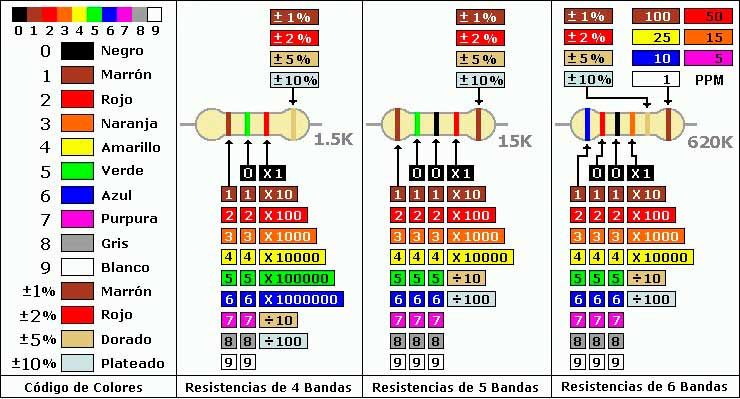

### <span style="color:blue">Componentes del Hardware</span>

|Componente|Cantidad|Características|
|:---|:---|:-----|
|EZO-RGB|1| Embedded color sensor|
| Arduino UNO R3 |1| Microcontrolador |
|Computadora| 1| En la cual vemos los resultados


### <span style="color:blue">Esquema del hardware</span>

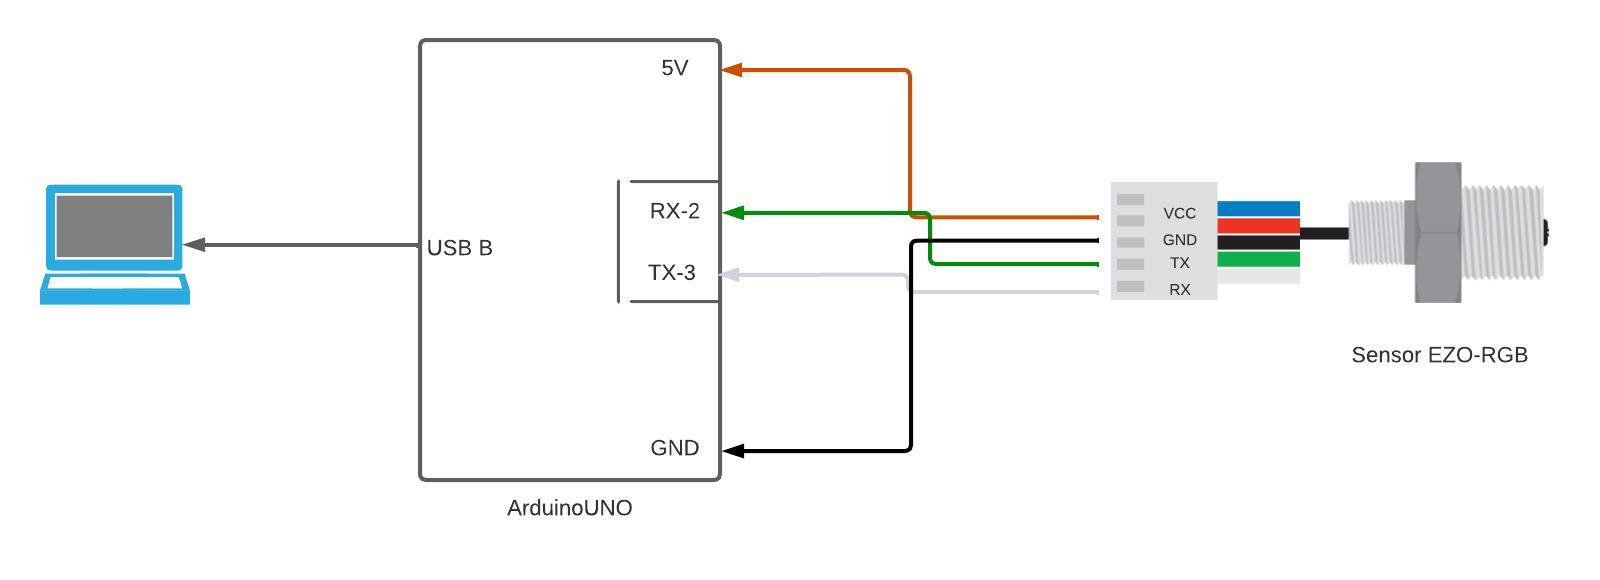

### <span style="color:blue">Parámetros en ArudinoIDE</span>

RX (3) - Se conecta el RX con el puerto número 3 del Arduino (TX)

TX (2) - Se conecta el TX con el puerto número 2 del Arduino (RX)

GND - Este lo podemos identificar por su color negro, se conecta directamente a tierra.

VCC (5V) - Este lo podemos identificar por su color rojo, hace referencia a la alimentación positiva.  

Comunicación:

* Data bit: 8-bit
* Baud rate: 9600 bits/s
* Parity: None
* Step bit: 1 stop bit
* Requisitos de entrada: 12 caracteres.

### <span style="color:blue">Configuración del sensor EZO-RGB con Arduino UNO </span>

```
#include <SoftwareSerial.h>

#define rx 2
#define tx 3

SoftwareSerial myserial(rx, tx);

String inputstring = "";
String sensorstring = "";
boolean input_string_complete = false;
boolean sensor_string_complete = false;

void setup() {
  Serial.begin(9600);
  myserial.begin(9600);
  inputstring.reserve(10);
  sensorstring.reserve(30);
}

void serialEvent() {
  inputstring = Serial.readStringUntil(13);
  input_string_complete = true;
}

void print_color_name(int red, int green, int blue) {
  // Comparación de valores RGB para determinar el color
  if (red < 20 && green < 20 && blue < 20) {
    Serial.println("Color: Negro");
  } else if (red > 100 && green < 35 && blue < 35) {
    Serial.println("Color: Rojo");
  } else if (red > 120 && green < 45 && blue < 35) {
    Serial.println("Color: Naranja");
  } else if (red > 300 && green > 300 && blue < 150) {
    Serial.println("Color: Amarillo");
  } else if (red > 80 && green > 130 && blue < 85) {
    Serial.println("Color: Verde");
  } else if (red < 35 && green > 40 && blue > 80) {
    Serial.println("Color: Azul");
  } else if (red > 135 && green < 65 && blue > 50) {
    Serial.println("Color: Púrpura");
  }else if (red > 60 && green > 40 && blue < 65){
    Serial.println("Color: Cafe");
  }else if (red > 150 && green > 150 && blue > 150) {
    Serial.println("Color: Blanco");
  } else if (red < 100 && green < 100 && blue < 200) {
    Serial.println("Color: Gris");
  } else {
    Serial.println("Color: Desconocido");
  }
}

void loop() {
  if (input_string_complete == true) {
    myserial.print(inputstring);
    myserial.print('\r');
    inputstring = "";
    input_string_complete = false;
  }

  if (myserial.available() > 0) {
    char inchar = (char)myserial.read();
    sensorstring += inchar;
    if (inchar == '\r') {
      sensor_string_complete = true;
    }
  }

  if (sensor_string_complete == true) {
    if (isdigit(sensorstring[0]) == false) {
      Serial.println(sensorstring);
    } else {
      print_RGB_data();  // Aquí deberías llamar a la función print_color_name en lugar de print_RGB_data
    }
    sensorstring = "";
    sensor_string_complete = false;
  }
}

void print_RGB_data(void) {
  char sensorstring_array[30];
  char *red;
  char *grn;
  char *blu;
  int int_red;
  int int_grn;
  int int_blu;

  sensorstring.toCharArray(sensorstring_array, 30);
  red = strtok(sensorstring_array, ",");
  grn = strtok(NULL, ",");
  blu = strtok(NULL, ",");

  Serial.print("RED:");
  Serial.println(red);

  Serial.print("GREEN:");
  Serial.println(grn);

  Serial.print("BLUE:");
  Serial.println(blu);

  int_red = atoi(red);
  int_grn = atoi(grn);
  int_blu = atoi(blu);

  print_color_name(int_red, int_grn, int_blu);
}


```



##Resultados:

|Componente|Imágen|
|:---|:-----|
|Sensor encendido|img = mimg.imread('/content/Sensor.jpeg')|
|Sensor de atras| img = mimg.imread('/content/Sensor2.jpeg') |
|Arduino conectado| img = mimg.imread('/content/Sensor3.jpeg)|




##Referencias:

AtlasScientific. (2022). *Connecting A Color Sensor To An Arduino Uno*
  https://atlas-scientific.com/blog/color-sensor-arduino/

AtlasScientific. (2021). *EZO-RGB™ Embedded Color Sensor*
  https://files.atlas-scientific.com/EZO_RGB_Datasheet.pdf

  https://www.warburtech.co.uk/products/sensors/colour/atlas.scientific.ezo-rgb.embedded.colour.sensor/downloads/ENV-RGB.pdf

  https://sdindustrial.com.mx/blog/codigo-de-colores-resistencias/
  
  https://hetpro-store.com/TUTORIALES/i2c/

  https://sensorsandprobes.com/products/probes-ezo-rgb%E2%84%A2-embedded-color-sensor